### Data Analysis of Customer Churn Prediction data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
## Data Summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1. There are only 3 columns with numbers (SeniorCitizen, tenure, MonthlyCharges).
2. All other columns are categorical

### Checking Null values

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

remarks:-

1. There is no any null values in the data

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype(float)
categorical_df = df.drop(['SeniorCitizen','tenure','MonthlyCharges','TotalCharges'],axis=1)
categorical_df.drop('customerID',axis=1,inplace=True)
    

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype(float)

In [8]:
categorical_df = df.select_dtypes(include='object')
categorical_df.drop('customerID',axis=1,inplace=True)
for col in categorical_df.columns:
    print(col," : ",categorical_df[col].unique())

gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


In [9]:
categorical_df = df.select_dtypes(include='object').columns.tolist()
categorical_df.remove('customerID')
df_encoded = pd.get_dummies(data=df,columns=categorical_df,drop_first=True)
df_encoded.head(2)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [10]:
df.drop('customerID',axis=1,inplace=True)

In [11]:
numerical_df = df.select_dtypes(include='number')
numerical_df.drop(columns='SeniorCitizen',axis=1,inplace=True)

In [12]:
numerical_df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


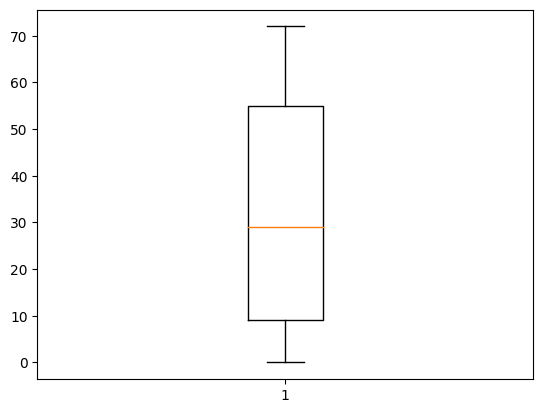

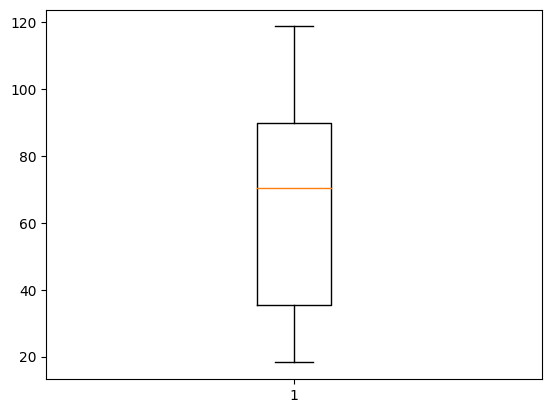

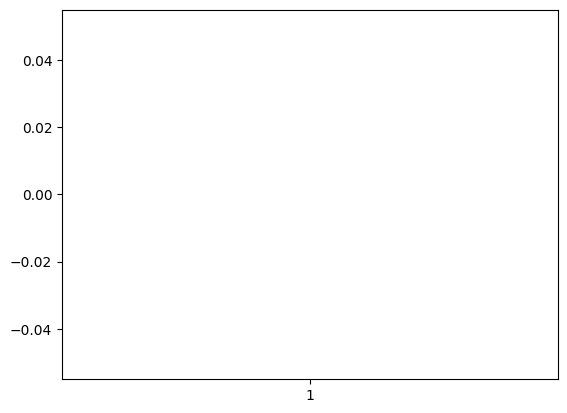

In [13]:
import matplotlib.pyplot as plt
## checking outliers
num_cols_per_row = len(numerical_df.columns)
num_rows = (len(numerical_df.columns) + num_cols_per_row - 1)
for col in numerical_df.columns:
    plt.boxplot(numerical_df[col])
    plt.show()
    


Remarks:
1. The data contains no outliers.

### Checking the Total number Churn_yes and no

/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Churn_Yes', ylabel='count'>

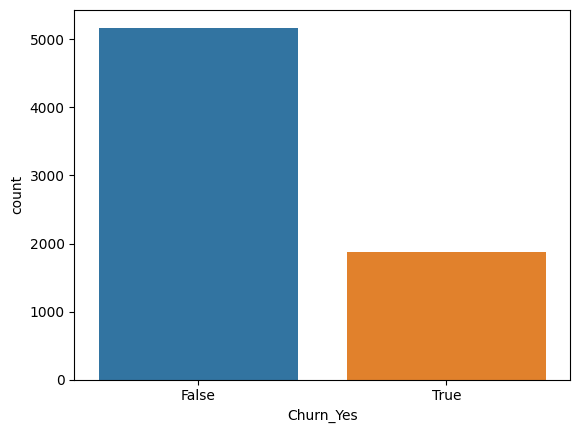

In [14]:
import seaborn as sns

sns.countplot(x='Churn_Yes',data=df_encoded)

Remarks:-
 It looks like the Churning No is more than churn_yes.

In [15]:
### Split data into independent and dependent variables

df_encoded.drop('customerID',axis=1,inplace=True)


In [16]:
df_encoded.dropna(inplace=True)
X = df_encoded.drop('Churn_Yes',axis=1)
y = df_encoded['Churn_Yes']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler



X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=12)


classifier = LogisticRegression()
classifier.fit(X_train,y_train)

#prediction 
y_pred = classifier.predict(X_test)
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result


/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Actual,Predicted
6226,False,False
3570,False,False
6798,False,True
6489,True,False
2819,False,False
...,...,...
6241,True,True
4734,True,False
2424,True,False
3750,False,False


In [18]:
cf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n', cf_matrix)

Confusion Matrix 
 [[945 117]
 [163 182]]


Text(0.5, 23.52222222222222, 'Predicted label')

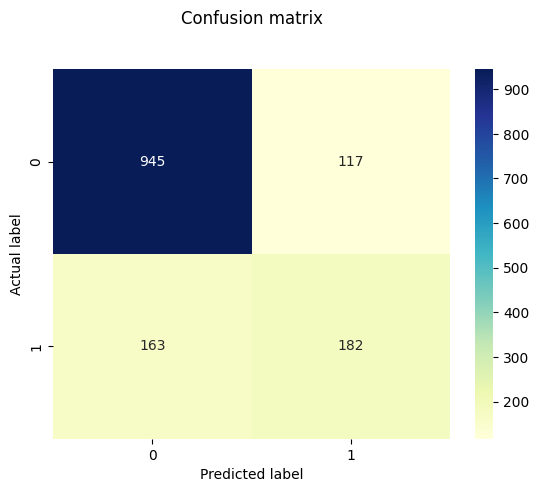

In [19]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
print("Accuracy of the model")
print(accuracy_score(y_test,y_pred)*100,'%')

Accuracy of the model
80.09950248756219 %
